# Data Import
This section covers importing data from various sources.

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


### Data Loading and Initial Exploration

In this section, we load the S&P 500 index data from a CSV file and display the first and last few rows to understand the dataset's structure.


In [2]:
# import yfinance as yf
# df = yf.download('^SPX', start ='1995-12-27')

df = pd.read_csv('SPX1995.csv')

In [3]:
    df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-01-03,459.209991,459.269989,457.200012,459.109985,459.109985,262450000
1,1995-01-04,459.130005,460.720001,457.559998,460.709991,460.709991,319510000
2,1995-01-05,460.730011,461.299988,459.750000,460.339996,460.339996,309050000
3,1995-01-06,460.380005,462.489990,459.470001,460.679993,460.679993,308070000
4,1995-01-09,460.670013,461.769989,459.739990,460.829987,460.829987,278790000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7336,2024-02-23,5100.919922,5111.060059,5081.459961,5088.799805,5088.799805,3672790000
7337,2024-02-26,5093.000000,5097.660156,5068.910156,5069.529785,5069.529785,3683930000
7338,2024-02-27,5074.600098,5080.689941,5057.290039,5078.180176,5078.180176,3925950000
7339,2024-02-28,5067.200195,5077.370117,5058.350098,5069.759766,5069.759766,3789370000
7340,2024-02-29,5085.359863,5104.990234,5061.890137,5096.270020,5096.270020,5219740000


In [5]:
df.shape

(7341, 7)

### Data Cleaning: Handling Missing Values and Duplicates

This section focuses on identifying and addressing any missing or duplicated data entries to ensure the quality and reliability of the dataset for further analysis.


In [6]:
missing_values = df.isnull().sum()
df_duplicated= df.duplicated().sum().any()

# here we drop rows if there is missing values 
df_cleaned = df.dropna()

print("Missing values in each column:\n", missing_values)
print("\n \n duplicated values :  ", df_duplicated)

Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 
 duplicated values :   False




### Visualization of S&P 500 Stock Prices

In this section, we convert the 'Date' column to datetime format for proper indexing and plot the S&P 500 closing and opening prices over time to visualize trends and patterns in the data.


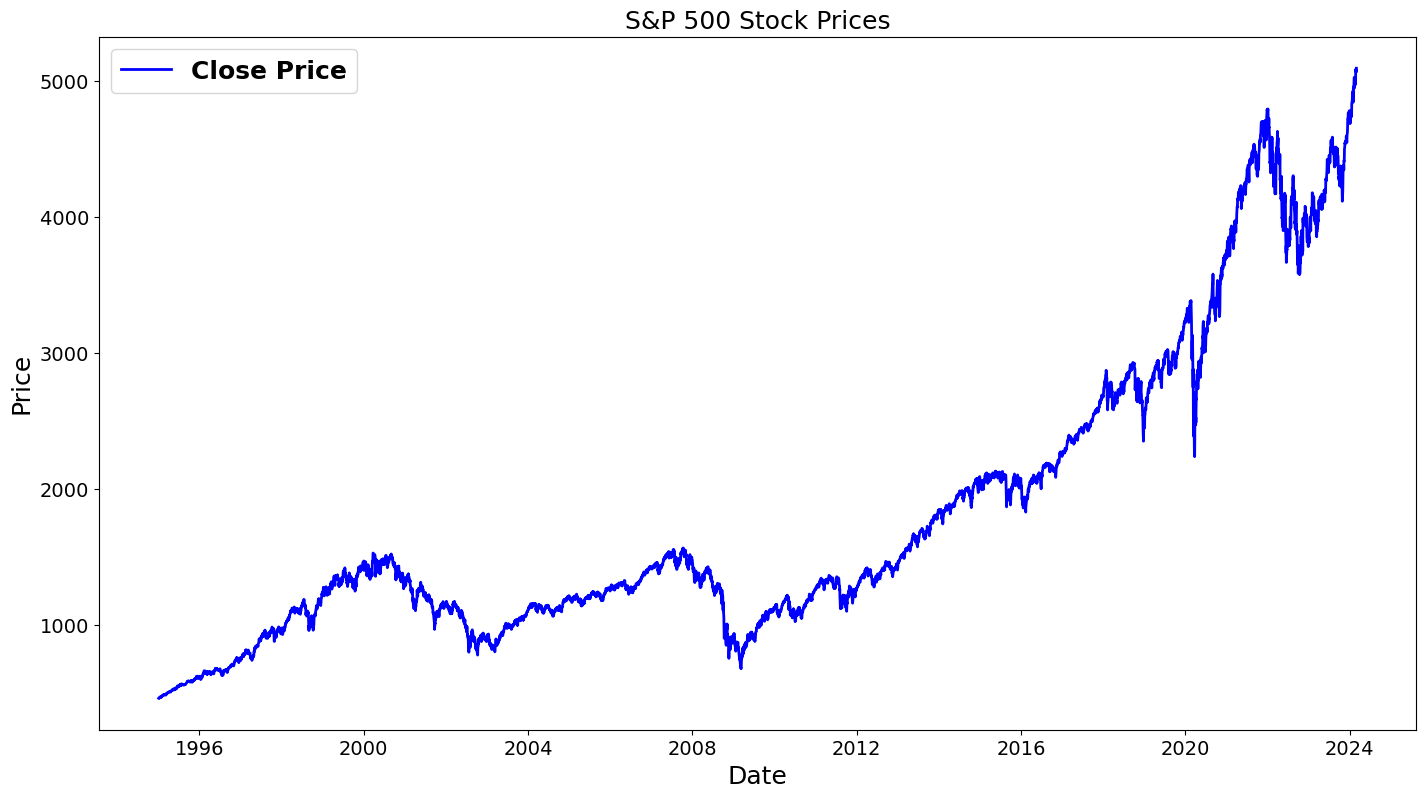

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the style of seaborn
# sns.set(style='darkgrid')

# # Convert 'Date' to datetime 
# df['Date'] = pd.to_datetime(df['Date'])

# # Plotting the closing prices against the date
# plt.figure(figsize=(14, 7))
# plt.plot(df['Date'], df['Close'], label='Close Price')

# plt.plot(df['Date'], df['Open'], label='Open Price', alpha=0.5)


# # Labels and Title
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('S&P 500 Stock Prices')
# plt.legend()

# # Show plot
# plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
# sns.set(style='darkgrid')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])


plt.figure(figsize=(17, 9))  # Adjusted for a larger size
# plt.plot(df['Date'], df['Open'], label='Open Price', color='orange', linestyle='-', linewidth=2)
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', linestyle='-', linewidth=2)

plt.xticks(fontsize=14)  # Larger font size for the x-axis ticks
plt.yticks(fontsize=14)
# Labels and Title with increased font sizes
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('S&P 500 Stock Prices', fontsize=18)
plt.legend(prop={'size': 18, 'weight': 'bold'})

# Save plot before showing
plt.savefig('sp500_stock_prices.png', format='png', dpi=300)  # Save as high-resolution PNG
plt.savefig('sp500_stock_prices.pdf', format='pdf')  # Save as PDF for vectorized format

# Show plot
plt.show()



### Feature Preparation

Preparing the dataset for modeling by selecting the 'Open' and 'Volume' as features and 'Close' as the target variable. Converting 'Date' to a numerical format for use in polynomial features.


In [8]:

features = [ 'Open', 'High', 'Low', 'Volume']
target = 'Close'

# We split the data into features and target
X = df[features]
y = df[target]




### Data Splitting

Dividing the data into training and test sets to validate the performance of our model. Ensuring a fair distribution without shuffling due to the time-series nature of the data.


In [9]:

# we Save the indexes before the split
original_indexes = df.index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)



In [10]:
#model = DecisionTreeRegressor(random_state=0)
model = DecisionTreeRegressor(max_depth=10, min_samples_split=50, min_samples_leaf=20, random_state=42)


model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                      random_state=42)

### Preparing Index Alignment Before Making Predictions

Before making predictions, it's important to retrieve and store the original indexes of our training and testing sets. This allows us to maintain a reference to the original dates of our data points, ensuring that after we make our predictions, we can accurately analyze and visualize the results in the context of their specific times in the dataset.


In [11]:

# Retrieve the original indexes for train and test sets
train_indexes = original_indexes[:len(y_train)]
test_indexes = original_indexes[len(y_train):]

# You can now use train_indexes and test_indexes as they contain the original DataFrame indexes
print(f'Training data index range: {train_indexes.min()} to {train_indexes.max()}')
print(f'Testing data index range: {test_indexes.min()} to {test_indexes.max()}')

Training data index range: 0 to 5871
Testing data index range: 5872 to 7340


### Model Predictions

After training our regression model, we proceed to make predictions on both the training and testing datasets. These predictions will allow us to evaluate the model's performance by comparing the predicted stock prices against the actual closing prices. It's crucial to ensure that the predictions align with the original data's timeline, hence the index retrieval before this step.


In [12]:
# Predict on the training set for visualization purposes
y_train_pred = model.predict(X_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

### Organizing and Inspecting Prediction Results

In this section, we consolidate the predictions with the actual values into structured DataFrames, aligning them with their corresponding dates. This organization is essential for an intuitive inspection of the model's predictive accuracy. It also lays the groundwork for subsequent analysis, such as calculating error metrics and visualizing the results.


In [13]:



# Define train_dates and test_dates by indexing df['Date']
train_dates = df['Date'].iloc[:len(y_train)].reset_index(drop=True)
test_dates = df['Date'].iloc[-len(y_test):].reset_index(drop=True)

# Create DataFrames for the training and test data predictions with dates
train_results = pd.DataFrame({
    'Date': train_dates,
    'Actual_Close': y_train.reset_index(drop=True),
    'Predicted_Close': y_train_pred
})

test_results = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': y_test.reset_index(drop=True),
    'Predicted_Close': y_test_pred
})

# Now, let's try printing the head of these DataFrames to inspect
print("train_results \n")
print( train_results , "\n \n")

print("test_results \n")
print( test_results)


train_results 

           Date  Actual_Close  Predicted_Close
0    1995-01-03    459.109985       465.801739
1    1995-01-04    460.709991       465.801739
2    1995-01-05    460.339996       465.801739
3    1995-01-06    460.679993       465.801739
4    1995-01-09    460.829987       465.801739
...         ...           ...              ...
5867 2018-04-23   2670.290039      2650.707147
5868 2018-04-24   2634.560059      2650.707147
5869 2018-04-25   2639.399902      2650.707147
5870 2018-04-26   2666.939941      2650.707147
5871 2018-04-27   2669.909912      2650.707147

[5872 rows x 3 columns] 
 

test_results 

           Date  Actual_Close  Predicted_Close
0    2018-04-30   2648.050049      2650.707147
1    2018-05-01   2654.800049      2650.707147
2    2018-05-02   2635.669922      2650.707147
3    2018-05-03   2629.729980      2650.707147
4    2018-05-04   2663.419922      2650.707147
...         ...           ...              ...
1464 2024-02-23   5088.799805      2808.062512


### Performance Metrics Evaluation

In this segment, we compute and display the performance metrics for both the training and testing datasets. This evaluation involves Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). These metrics help to quantify the accuracy of our model and reveal how well the predictions match up with the actual stock prices.


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for the training set
train_mae = mean_absolute_error(train_results['Actual_Close'], train_results['Predicted_Close'])
train_rmse = np.sqrt(mean_squared_error(train_results['Actual_Close'], train_results['Predicted_Close']))
train_mape = mean_absolute_percentage_error(train_results['Actual_Close'], train_results['Predicted_Close'])

# Calculate metrics for the testing set
test_mae = mean_absolute_error(test_results['Actual_Close'], test_results['Predicted_Close'])
test_rmse = np.sqrt(mean_squared_error(test_results['Actual_Close'], test_results['Predicted_Close']))
test_mape = mean_absolute_percentage_error(test_results['Actual_Close'], test_results['Predicted_Close'])

# Print out the metrics for the training set
print("Training set metrics:")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape:.2f}%")

# Print out the metrics for the testing set
print("\nTesting set metrics:")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape:.2f}%")


Training set metrics:
Mean Absolute Error (MAE): 6.20
Root Mean Squared Error (RMSE): 8.81
Mean Absolute Percentage Error (MAPE): 0.49%

Testing set metrics:
Mean Absolute Error (MAE): 884.28
Root Mean Squared Error (RMSE): 1111.20
Mean Absolute Percentage Error (MAPE): 21.32%


### Visualization of Model Predictions Against Actual Data

In accordance with our project's aim to assess machine learning model efficacy, this visualization plots predicted stock prices from our model against the actual S&P 500 closing prices. The graph provides a visual representation of the model's performance over time, showcasing the alignment of predictions with real-world data. This step is crucial for a comprehensive evaluation, allowing for a clear, intuitive understanding of the model's predictive capabilities in both training and testing phases.


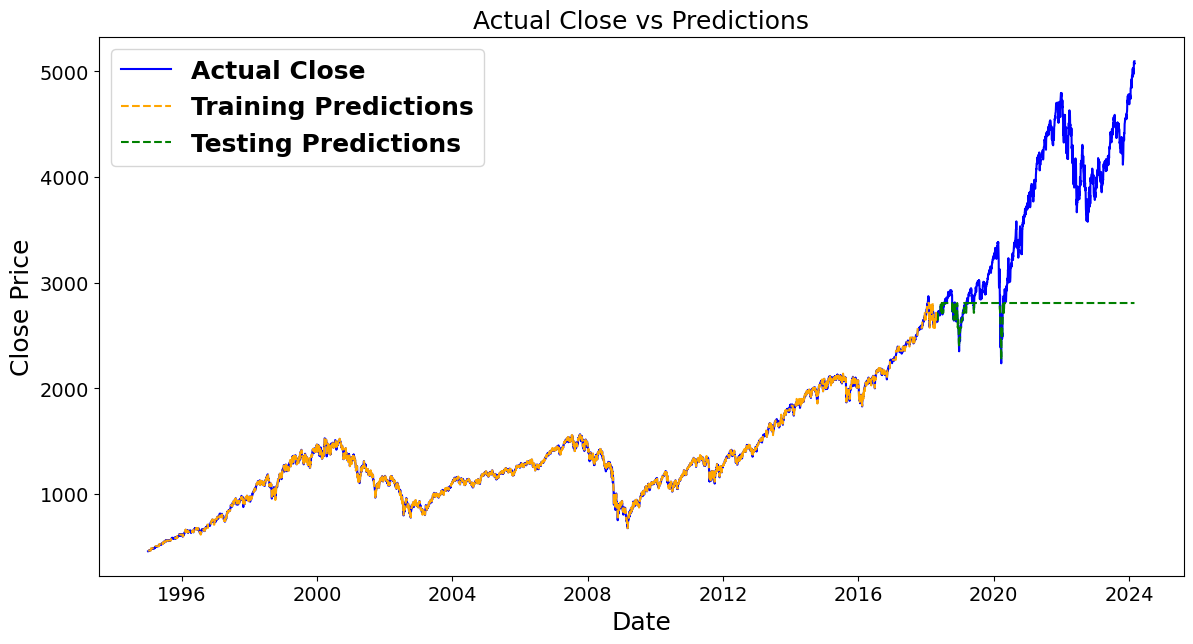

In [15]:

import matplotlib.pyplot as plt
import pandas as pd

# Combine train and test results into a single DataFrame
combined_results = pd.concat([train_results, test_results])

# Convert 'Date' to datetime and sort by date to ensure correct plotting order
combined_results['Date'] = pd.to_datetime(combined_results['Date'])
combined_results.sort_values('Date', inplace=True)

# Set 'Date' as the index for plotting
combined_results.set_index('Date', inplace=True)

# Plot the actual close prices
plt.figure(figsize=(14,7))
plt.plot(combined_results['Actual_Close'], label='Actual Close', color='blue')

# Plot the training predictions - we use loc to select the train date range
plt.plot(train_results['Date'], train_results['Predicted_Close'], label='Training Predictions', color='orange', linestyle='--')

# Plot the testing predictions - we use loc to select the test date range
plt.plot(test_results['Date'], test_results['Predicted_Close'], label='Testing Predictions', color='green', linestyle='--')

#Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Close vs Predictions')
plt.legend()

plt.xticks(fontsize=14)  # Larger font size for the x-axis ticks
plt.yticks(fontsize=14)
# Add labels and title
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Actual Close vs Predictions', fontsize=18)
plt.legend(prop={'size': 18, 'weight': 'bold'})
plt.savefig('analys_dt_graph.pdf', format='pdf')
plt.show()



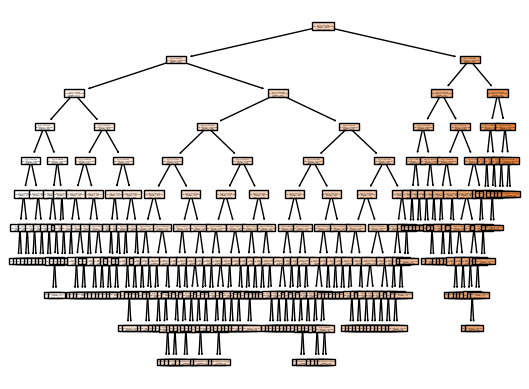

In [16]:
from sklearn.tree import plot_tree

plot_tree(model, filled=True)
plt.show()


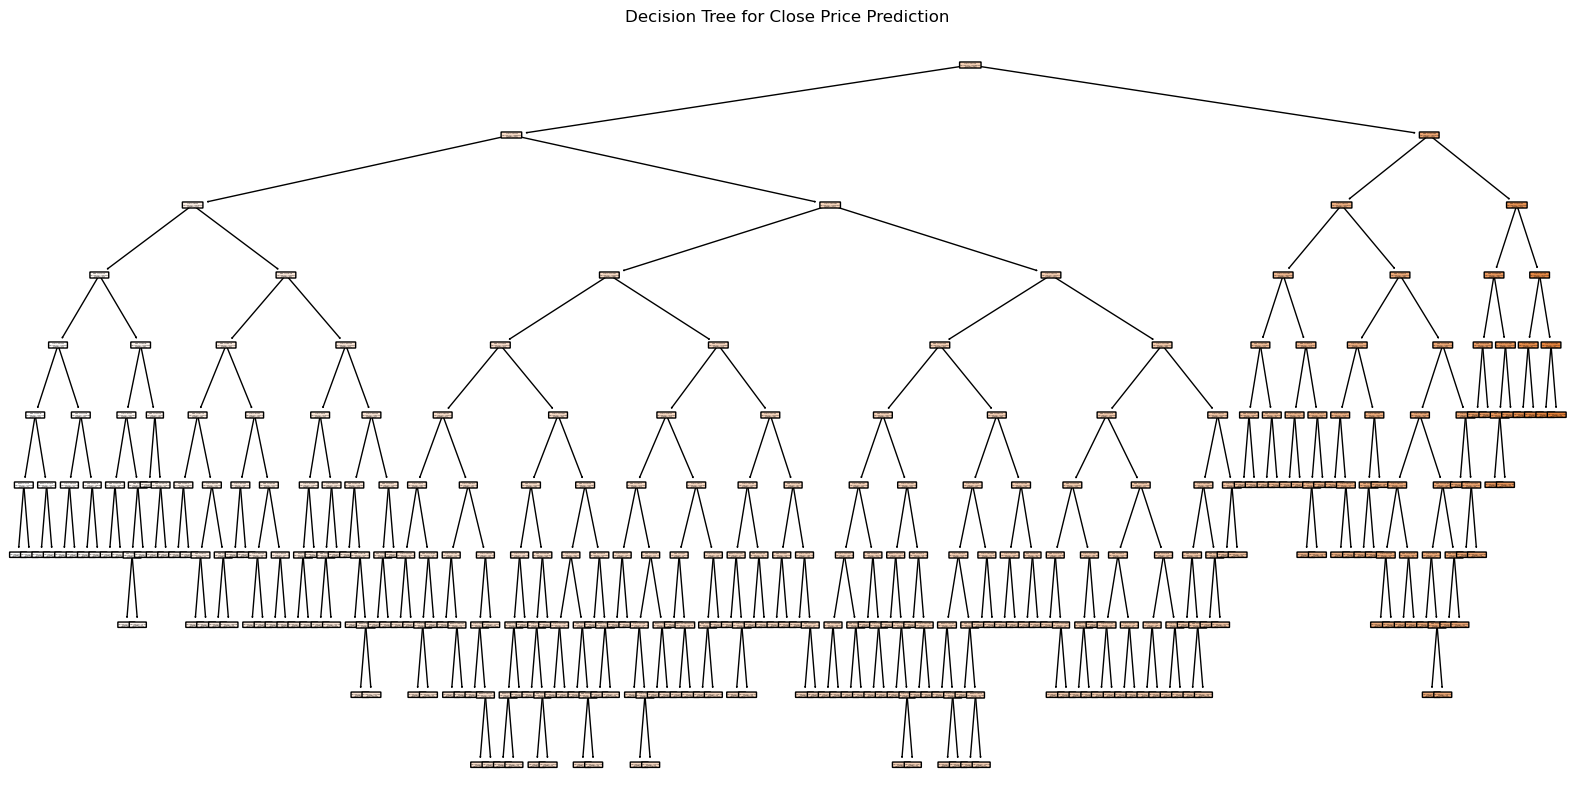

In [17]:
import os
from sklearn import tree
import matplotlib.pyplot as plt

# Create the directory if it doesn't exist
os.makedirs("visual", exist_ok=True)

# Export the decision tree to a .dot file
tree.export_graphviz(model, out_file="visual/decision-tree-datamaster.dot", 
                     feature_names=features, 
                     class_names=['Close'], 
                     label='all', 
                     rounded=True, 
                     filled=True)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, 
               feature_names=features, 
               class_names=['Close'], 
               label='all', 
               rounded=True, 
               filled=True)
plt.title("Decision Tree for Close Price Prediction")
plt.savefig("visual/decision-tree-datamaster.pdf", format='pdf')
plt.show()
